In [50]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

*Given parameters*

In [51]:
size = 10
sigma = 0.3
M = 9
alpha = 5e-3          # given in the problem
beta = 11.1

*Data Set (the same one for previous two activities)*

In [52]:
x_train = np.random.uniform(0, 1, size)
y_train = np.sin(2 * np.pi * x_train) + np.random.normal(0, sigma, size)

*Bayesian curve fitting*

In [53]:
def get_phi(x, m_order):
    # define the polynomial basis vector [1, x, x^2, ..., x^M]
    return np.array([x**i for i in range(m_order + 1)]).reshape(-1, 1)

# construct phi matrix
Phi = np.array([get_phi(xi, M).flatten() for xi in x_train])

# construct matrix S
I = np.eye(M + 1)
S_inv = alpha * I + beta * (Phi.T @ Phi)
S = np.linalg.inv(S_inv)

# predictive distribution
x_plot = np.linspace(0, 1, 200)
m_x = []
s2_x = []

# summation
sum_phi_t = Phi.T @ y_train

for x in x_plot:
    phi_x = get_phi(x, M)
    
    # Mean m(x)
    mean = beta * (phi_x.T @ S @ sum_phi_t)
    
    # Variance s^2(x)
    variance = (1.0 / beta) + (phi_x.T @ S @ phi_x)
    
    m_x.append(mean.item())
    s2_x.append(variance.item())

m_x = np.array(m_x)
std_x = np.sqrt(s2_x)

# print("calculations complete.")

<>:3: SyntaxWarning: invalid escape sequence '\p'
/tmp/xpython_42/1996302532.py:3: SyntaxWarning: invalid escape sequence '\p'
  plt.fill_between(x_plot, m_x - std_x, m_x + std_x, color='pink', alpha=0.5, label='Uncertainty ($\pm 1\sigma$)')


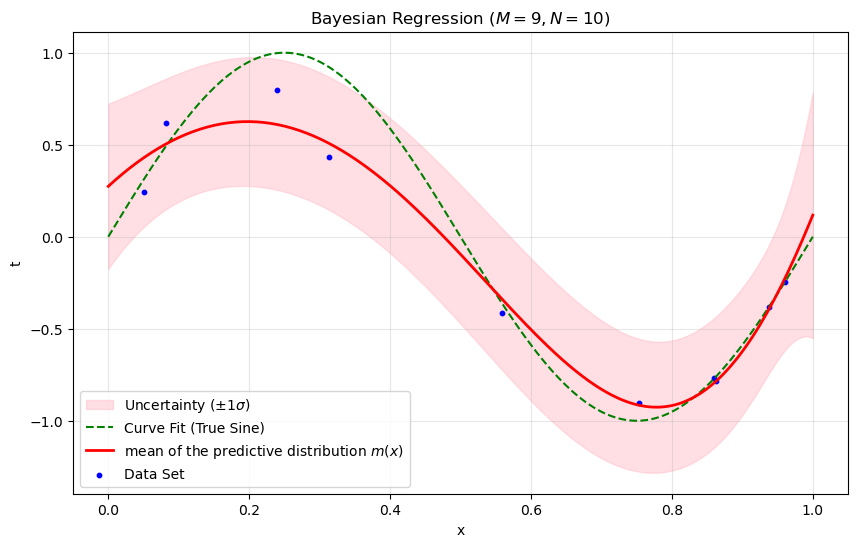

In [54]:
plt.figure(figsize=(10, 6))

plt.fill_between(x_plot, m_x - std_x, m_x + std_x, color='pink', alpha=0.5, label='Uncertainty ($\pm 1\sigma$)')

# plot curve fit(true function) and Baysian linear regression
plt.plot(x_plot, np.sin(2 * np.pi * x_plot), color='green', linestyle='--', label='Curve Fit (True Sine)')
plt.plot(x_plot, m_x, color='red', linewidth=2, label='mean of the predictive distribution $m(x)$')

# plot data set
plt.scatter(x_train, y_train, s=10, color='blue', alpha=1, label='Data Set')

plt.title(f'Bayesian Regression ($M={M}, N={size}$)')
plt.xlabel('x')
plt.ylabel('t')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

### Write Up (Discussion)
---
a) We recall equations (1.68) through (1.72): 

$$p(t|x, \mathbf{x}, \mathbf{t}) = \int p(t|x, \mathbf{w})p(\mathbf{w}|\mathbf{x}, \mathbf{t}) \text{d}\mathbf{w} \tag{1.68}$$

$$p(t|x, \mathbf{x}, \mathbf{t}) = \mathcal{N}(t|m(x), s^2(x)) \tag{1.69}$$

$$m(x) = \beta \phi(x)^{\text{T}} \mathbf{S} \sum_{n=1}^{N} \phi(x_n)t_n \tag{1.70}$$

$$s^2(x) = \beta^{-1} + \phi(x)^{\text{T}} \mathbf{S} \phi(x) \tag{1.71}$$

$$\mathbf{S}^{-1} = \alpha \mathbf{I} + \beta \sum_{n=1}^{N} \phi(x_n)\phi(x_n)^{\text{T}} \tag{1.72}$$

In eq 1.69, we can see that the predictive distribution $p(t|x, \mathbf{x}, \mathbf{t})$ has pre-determined condition on the mean $m(x)$ and variance $s^2(x)$ (eq 1.69), and $m(x)$ and variance $s^2(x)$ are both matricies constructed on $\beta$ (eq. 1.70, 1.71). Although the variance $s^2(x)$ depends on the $\mathbf{S}$ matrix, which contains $\alpha$, the effect from $\alpha$ only for a unit matrix shift (eq 1.72). Hence $\beta$ plays an important role in our modeling. There is also one other thing, that $\beta$ is defined as $\frac{1}{\sigma^2}$. We know $\sigma$ affects our training data set noise, and thus $\beta$ must have significance in this modeling. 

b) According to the textbook's definition the perspective of frequentist is related to the probabilities in terms of the frequencies of random, repeatable events. Furthermore, it says "...in a frequentist setting, $\mathbf{w}$ is considered to be a fixed parameter." <br>
In our approach, we didn't explicitly fix every $\mathbf{w_i} \in \mathbf{w}$, but we did $fix$ the parameter $\beta$ and $\alpha$. As a result, the Bayesian approach we use here might share fundemental similarities with frequentist approach, and it might have similar output with frequentist approach. 